# MODULES


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn import datasets

sns.set()


___

# APPROXIMATING DISTRIBUTIONS

The CDF of some distributions, especially the binomial distribution, become computationnaly expensive for large samples. This is why it can be useful to use approximations that are much faster to calculate whenever possible.


___

# POISSON VS BINOMIAL

The Poisson distribution is a limit of the Binomial distribution for rare events: low probability of success and large number of trials. Importantly, the Poisson distribution is often simpler to work with because it has only one parameter instead of two.


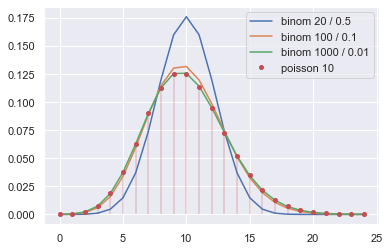

In [79]:
# Poisson vs Binomial distributions
# same mean if np = lambda
# same standard deviation when n >> p
x = range(0, 25)

_ = plt.plot(x, stats.binom.pmf(x, 20, 0.5), label='binom 20 / 0.5')
_ = plt.plot(x, stats.binom.pmf(x, 100, 0.1), label='binom 100 / 0.1')
_ = plt.plot(x, stats.binom.pmf(x, 1000, 0.01), label='binom 1000 / 0.01')
_ = plt.plot(x, stats.poisson.pmf(x, 10), 'ro', ms=4, label='poisson 10')
_ = plt.vlines(x, 0, stats.poisson.pmf(x, 10), colors='r', lw=2, alpha=0.2)

_ = plt.legend(loc='top right')


In [83]:
# Proba of having at most one success: Poisson vs Binomial
print('Poisson vs Binomial')
print('Poisson (l=10):         {:0.3}'.format(stats.poisson.cdf(5, 10)))
print('Binom (n=20, p=0.5):    {:0.3}'.format(stats.binom.cdf(5, 20, 0.5)))
print('Binom (n=100, p=0.1):   {:0.3}'.format(stats.binom.cdf(5, 100, 0.1)))
print('Binom (n=1000, p=0.01): {:0.3}'.format(stats.binom.cdf(5, 1000, 0.01)))


Poisson vs Binomial
Poisson (l=10):         0.0671
Binom (n=20, p=0.5):    0.0207
Binom (n=100, p=0.1):   0.0576
Binom (n=1000, p=0.01): 0.0661


___

# BINOMIAL VS NORMAL

The Binomial distribution is not symmetric, but can be approximated by a Normal distribution of same mean and variance if $n$ is not too small and $p$ not too close to either 0 or 1 (the approximation is fairly accurate when both $n *p$ and $n * (1-p)$ are both ≥ 5).


In [84]:
def binom_vs_normal(n, p, ax):
    """
    plot the pmf of a binomial distrib for n experiments with proba of success p
    vs the pdf of the normal distrib of same mean and variance.
    """

    mu = n * p
    sd = np.sqrt(n*p*(1-p))
    xmin = max(0, np.floor(mu - 4 * sd).astype(int))
    xmax = np.ceil(mu + 4 * sd).astype(int)
    x_disc = range(xmin, xmax)
    x_cont = np.linspace(xmin, xmax, 50)
    
    _ = ax.plot(x_disc, stats.binom.pmf(x_disc, n, p), 'bo', ms=4)
    _ = ax.vlines(x_disc, 0, stats.binom.pmf(x_disc, n, p), colors='b', lw=1)
    _ = ax.plot(x_cont, stats.norm.pdf(x_cont, mu, sd), color='red')
    _ = ax.set_xticks(x_disc)

    _ = ax.set_title('n = {}, p = {}, approx: {}'.format(n, p, 'good' if n*p >= 5 and n*(1-p) >= 5 else 'weak'))


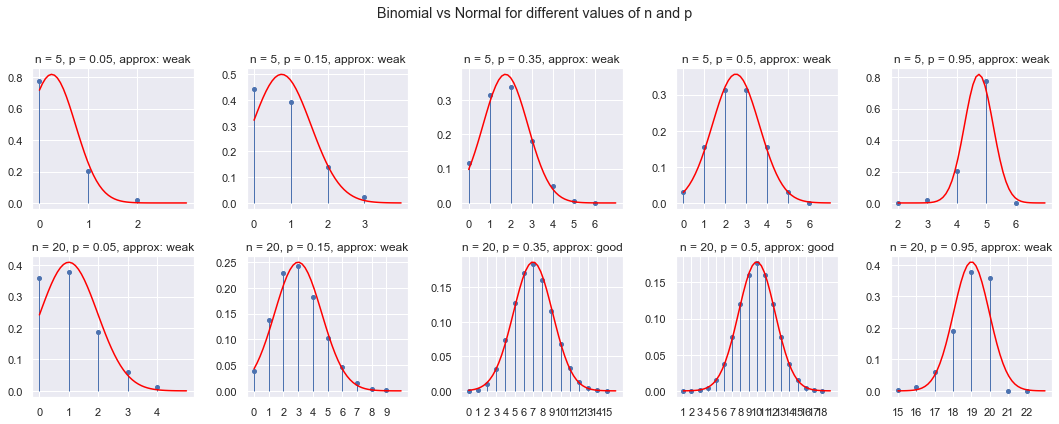

In [85]:
# Plot the PMF and PDF
fig, ax = plt.subplots(nrows=2, ncols=5, figsize = (5 * 3, 2 * 3))

binom_vs_normal(5, 0.05, ax[0, 0])
binom_vs_normal(5, 0.15, ax[0, 1])
binom_vs_normal(5, 0.35, ax[0, 2])
binom_vs_normal(5, 0.50, ax[0, 3])
binom_vs_normal(5, 0.95, ax[0, 4])

binom_vs_normal(20, 0.05, ax[1, 0])
binom_vs_normal(20, 0.15, ax[1, 1])
binom_vs_normal(20, 0.35, ax[1, 2])
binom_vs_normal(20, 0.50, ax[1, 3])
binom_vs_normal(20, 0.95, ax[1, 4])

fig.suptitle('Binomial vs Normal for different values of n and p')
fig.tight_layout(rect=[0, 0, 1, 0.9])


___

# POISSON VS NORMAL

The Poisson distribution can an be approximated by a Normal distribution of same mean and variance if $\lambda$ is large (the approximation is fairly accurate when $\lambda$ is greater than 10, except deep in the tails).


In [86]:
def poisson_vs_normal(l, ax):
    """
    plot the pmf of a poisson distrib for n experiments with proba of success p
    vs the pdf of the normal distrib of same mean and variance.
    """

    mu = l
    
    sd = np.sqrt(l)
    xmin = max(0, np.floor(mu - 4 * sd).astype(int))
    xmax = np.ceil(mu + 4 * sd).astype(int)
    x_disc = range(xmin, xmax)
    x_cont = np.linspace(xmin, xmax, 50)
    
    _ = ax.plot(x_disc, stats.poisson.pmf(x_disc, l), 'bo', ms=4)
    _ = ax.vlines(x_disc, 0, stats.poisson.pmf(x_disc, l), colors='b', lw=1)
    _ = ax.plot(x_cont, stats.norm.pdf(x_cont, mu, sd), color='red')
    _ = ax.set_xticks(x_disc)

    _ = ax.set_title('lambda = {}'.format(l))


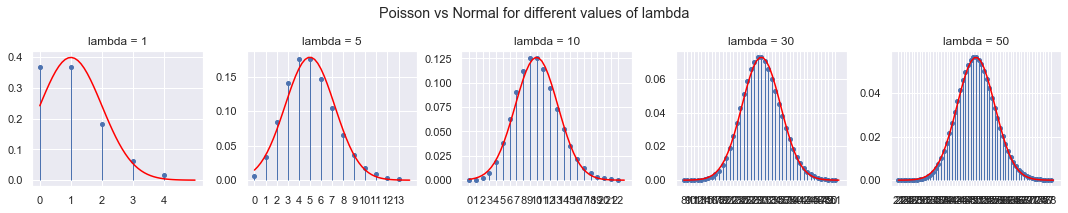

In [87]:
# Plot the PMF and PDF
fig, ax = plt.subplots(nrows=1, ncols=5, figsize = (5 * 3, 1 * 3))

poisson_vs_normal(1, ax[0])
poisson_vs_normal(5, ax[1])
poisson_vs_normal(10, ax[2])
poisson_vs_normal(30, ax[3])
poisson_vs_normal(50, ax[4])

fig.suptitle('Poisson vs Normal for different values of lambda')
fig.tight_layout(rect=[0, 0, 1, 0.9])


___

# CONTINUITY CORRECTION

Approximating a discrete distribution by a continuous distribution requires an adjustment called a continuity correction. When you use a Normal distribution to approximate a Binomial or Poisson distribution, it’s as simple as adding or subtracting 0.5 to the discrete x-value:

| Discrete | Continuous               |
|----------|--------------------------|
| P(X = n) | P(n – 0.5 < X < n + 0.5) |
| P(X > n) | P(X > n + 0.5)           |
| P(X ≥ n) | P(X > n – 0.5)           |
| P(X < n) | P(X < n – 0.5)           |
| P(X ≤ n) | P(X < n + 0.5)           |


In [100]:
# Proba of having at most one success: Poisson vs Normal
print('Binomial vs Normal')
print('l=5,  x=5:  {:0.3} vs {:0.3}'.format(stats.binom.cdf(5, 5, 0.5), stats.norm.cdf(5.5, 5, np.sqrt(5))))
print('l=25, x=25: {:0.3} vs {:0.3}'.format(stats.binom.cdf(25, 25, 0.5), stats.norm.cdf(25.5, 25, np.sqrt(25))))
print('l=50, x=50: {:0.3} vs {:0.3}'.format(stats.binom.cdf(50, 50, 0.5), stats.norm.cdf(50.5, 50, np.sqrt(50))))


Binomial vs Normal
l=5,  x=5:  1.0 vs 0.588
l=25, x=25: 1.0 vs 0.54
l=50, x=50: 1.0 vs 0.528


In [88]:
# Proba of having at most one success: Poisson vs Normal
print('Poisson vs Normal')
print('l=5,  x=5:  {:0.3} vs {:0.3}'.format(stats.poisson.cdf(5, 5), stats.norm.cdf(5.5, 5, np.sqrt(5))))
print('l=25, x=25: {:0.3} vs {:0.3}'.format(stats.poisson.cdf(25, 25), stats.norm.cdf(25.5, 25, np.sqrt(25))))
print('l=50, x=50: {:0.3} vs {:0.3}'.format(stats.poisson.cdf(50, 50), stats.norm.cdf(50.5, 50, np.sqrt(50))))


Poisson vs Normal
l=5,  x=5:  0.616 vs 0.588
l=25, x=25: 0.553 vs 0.54
l=50, x=50: 0.538 vs 0.528
